In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pip install skimpy

In [ ]:
lien = "https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv"
df_cancer_breast = pd.read_csv(lien )
df_cancer_breast.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## **Dataset Description**
**Synthese:**<br>
Nb lignes (= nb patients) = 569 <br>
Nb colonnes(= attributs) = 32 (ID, Diagnostic, Variables medicales avec des valeurs type float<br>

Renseignements sur les attributs:<br>

* ID: Numéro d’identification
* Diagnostic (M = malin, B = bénin)
* 10 variables à valeur réelle sont calculées pour chaque cellule :
  - radius (=rayon) : distance du centre de la masse tumorale aux points sur le périmètre.
  - texture :
  - perimeter (= périmètre):
  - area (= aire): surface de la tumeur dans le tissu mammaire
  - smoothness (= douceur) (variation locale des longueurs de rayon)
  - compactness (= compacité): (périmètre 2 / surface - 1) On compare la circonférence de la tumeur à sa surface.
  - concavity (= concavité): la gravité des parties concaves du contour, indiquant combien les bords de la tumeur s'enfoncent vers l'intérieur.
  - concave points (= points concaves):  nombre de parties concaves du contour d'une masse mammaire
  - symmetry ( =symétrie): compare la forme d'un côté de la tumeur à l'autre côté pour voir à quel point ils se ressemblent
  - fractal_dimension (=dimension fractale): Mesure la variation de la dimension fractale des contours de la tumeur, décrivant la complexité des bords.

Mean (moyenne) , SE (erreur standart) et Worst ("pire" ou maxiamale) (moyenne des trois plus grandes valeurs) de ces variables ont été calculés, ce qui donne 30 caractéristiques. Par exemple, le champ 3 est Rayon moyen, le champ 13 est Rayon SE, le champ 23 est Rayon le plus mauvais.

In [ ]:
df_cancer_breast.shape

(569, 33)

In [ ]:
df_cancer_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **Nettoyage des données:**

In [ ]:
# La colonnes "Unnamed: 32" doit être supprimée, car elle est inutile.
# The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

df_cancer_breast.drop(['Unnamed: 32'], axis=1, inplace = True)

In [ ]:
df_cancer_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Trouver les valeurs manquantes:
df_cancer_breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Remplacer les valeurs \N par 'NaN' (pas de valeur)  =>

df_cancer_breast = df_cancer_breast.replace('\\N',np.nan)

In [ ]:
# Trouver les valeurs manquantes parmi toutes les colonnes en travaillant sur les lignes:
df_cancer_breast.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Trouver les valeurs duppliquées:
duplicated_rows= df_cancer_breast.duplicated()
duplicated_rows.value_counts()

False    569
Name: count, dtype: int64

In [ ]:
# Trouver les valeurs unique de diagnostic:
print('\nUnique values of "diagnosis": {}'.format(df_cancer_breast['diagnosis'].unique()))


Unique values of "diagnosis": ['M' 'B']


In [ ]:
#Concl: Pas de valeurs manquantes et pas de données en double

## **Exploration de données:**

In [ ]:
df_cancer_breast.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

In [ ]:
from skimpy import skim
skim(df_cancer_breast)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 569    │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 32     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │  0 │    0 │ 30370000 │ 12500000 │     8670 │   869200 │   906000 │  8813000 │ 91130000 │   ▇    │  │
│ │          │    │      │          │        0 │          │          │          │          │        0 │        │  │
│ │ radius_m │  0 │    0 │    14.13 │    3.524 │    6.981 │     11.7 │    13.37 │    15.78 │    28.11 │  ▂▇▃▂  │  │
│ │ ean      │    │      │          │          │          │          │          │          │          │        │  │
│ │ texture_ │  0 │    0 │    19.29 │    4.301 │     9.71 │    16.17 │    18.84 │     21.8 │    39.28 │  ▂▇▆▂  │  │
│ │ mean     │    │      │          │          │          │          │          │          │          │        │  │
│ │ perimete │  0 │    0 │    91.97 │     24.3 │    43.79 │    75.17 │    86.24 │    104.1 │    188.5 │  ▂▇▃▂  │  │
│ │ r_mean   │    │      │          │          │          │          │          │          │          │        │  │
│ │ area_mea │  0 │    0 │    654.9 │    351.9 │    143.5 │    420.3 │    551.1 │    782.7 │     2501 │  ▇▆▂▁  │  │
│ │ n        │    │      │          │          │          │          │          │          │          │        │  │
│ │ smoothne │  0 │    0 │  0.09636 │  0.01406 │  0.05263 │  0.08637 │  0.09587 │   0.1053 │   0.1634 │   ▅▇▃  │  │
│ │ ss_mean  │    │      │          │          │          │          │          │          │          │        │  │
│ │ compactn │  0 │    0 │   0.1043 │  0.05281 │  0.01938 │  0.06492 │  0.09263 │   0.1304 │   0.3454 │  ▇▇▃▁  │  │
│ │ ess_mean │    │      │          │          │          │          │          │          │          │        │  │
│ │ concavit │  0 │    0 │   0.0888 │  0.07972 │        0 │  0.02956 │  0.06154 │   0.1307 │   0.4268 │  ▇▃▂▁  │  │
│ │ y_mean   │    │      │          │          │          │          │          │          │          │        │  │
│ │ concave  │  0 │    0 │  0.04892 │   0.0388 │        0 │  0.02031 │   0.0335 │    0.074 │   0.2012 │  ▇▃▃▁  │  │
│ │ points_m │    │      │          │          │          │          │          │          │          │        │  │
│ │ ean      │    │      │          │          │          │          │          │          │          │        │  │
│ │ symmetry │  0 │    0 │   0.1812 │  0.02741 │    0.106 │   0.1619 │   0.1792 │   0.1957 │    0.304 │ ▁▇▇▂▁  │  │
│ │ _mean    │    │      │          │          │        

In [ ]:
# On affiche les lignes avec 'concavity_mean'=0
df_zero_concavity_mean = df_cancer_breast[df_cancer_breast['concavity_mean'] == 0]
df_zero_concavity_mean

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
101   862722         B        6.981         13.43           43.79      143.5   
140   868999         B        9.738         11.97           61.24      288.5   
174   871642         B       10.660         15.15           67.49      349.6   
175   872113         B        8.671         14.45           54.42      227.2   
192   875099         B        9.720         18.22           60.73      288.1   
314   894047         B        8.597         18.60           54.09      221.2   
391   903483         B        8.734         16.84           55.27      234.3   
473  9113846         B       12.270         29.97           77.42      465.4   
538   921092         B        7.729         25.49           47.98      178.8   
550   923748         B       10.860         21.48           68.51      360.5   
557   925236         B        9.423         27.88           59.26      271.3   
561   925311         B       11.200         29.37           70.67      386.0   
568    92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
101          0.11700           0.07568             0.0                  0.0   
140          0.09250           0.04102             0.0                  0.0   
174          0.08792           0.04302             0.0                  0.0   
175          0.09138           0.04276             0.0                  0.0   
192          0.06950           0.02344             0.0                  0.0   
314          0.10740           0.05847             0.0                  0.0   
391          0.10390           0.07428             0.0                  0.0   
473          0.07699           0.03398             0.0                  0.0   
538          0.08098           0.04878             0.0                  0.0   
550          0.07431           0.04227             0.0                  0.0   
557          0.08123           0.04971             0.0                  0.0   
561          0.07449           0.03558             0.0                  0.0   
568          0.05263           0.04362             0.0                  0.0   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
101  ...         7.930          19.54            50.41       185.2   
140  ...        10.620          14.10            66.53       342.9   
174  ...        11.540          19.20            73.20       408.3   
175  ...         9.262          17.04            58.36       259.2   
192  ...         9.968          20.83            62.25       303.8   
314  ...         8.952          22.44            56.65       240.1   
391  ...        10.170          22.80            64.01       317.0   
473  ...        13.450          38.05            85.08       558.9   
538  ...         9.077          30.92            57.17       248.0   
550  ...        11.660          24.77            74.08       412.3   
557  ...        10.490          34.24            66.50       330.6   
561  ...        11.920          38.30            75.19       439.6   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
101           0.15840            0.12020              0.0   
140           0.12340            0.07204              0.0   
174           0.10760            0.06791              0.0   
175           0.11620            0.07057              0.0   
192           0.07117            0.02729              0.0   
314           0.13470            0.07767              0.0   
391           0.14600            0.13100              0.0   
473           0.09422            0.05213              0.0   
538           0.12560            0.08340              0.0   
550           0.10010            0.07348              0.0   
557           0.10730            0.07158              0.0   
561           0.09267            0.05494              0.0   
568     

In [ ]:
df_cancer_breast = df_cancer_breast[df_cancer_breast['concavity_mean'] != 0]
df_cancer_breast

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...         25.38          17.33           184.60      2019.0   
1    ...         24.99          23.41           158.80      1956.0   
2    ...         23.57          25.53           152.50      1709.0   
3    ...         14.91          26.50            98.87       567.7   
4    ...         22.54          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
563  ...         24.29          29.41           179.10      1819.0   
564  ...         25.45          26.40           166.10      2027.0   
565  ...         23.69          38.25           155.00      1731.0   
566  ...         18.98          34.12           126.70      1124.0   
567  ...         25.74          39.42           184.60      1821.0   

     smoothness_worst  compactness_worst  concavity_worst  \
0              0.1622             0.6656           0.7119   
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
3              0.2098             0.8663           0.6869   
4              0.1374             0.2050           0.4000   
..                ...                ...              ...   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
566            0.1139             0.3094           0.3403   
567            0.1650             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
563                0.2542       

In [ ]:
df_cancer_breast['diagnosis'].value_counts(normalize =True) * 100

diagnosis
B    61.870504
M    38.129496
Name: proportion, dtype: float64

In [ ]:
# 61,9% des patients ont des tumeurs malignes et 38,1% des patients ont des tumeurs benigne

In [ ]:
df_cancer_breast['diagnosis'].value_counts()

diagnosis
B    344
M    212
Name: count, dtype: int64

In [ ]:
df_cancer_breast.describe().T

count          mean           std          min  \
id                       556.0  3.104770e+07  1.263967e+08  8670.000000   
radius_mean              556.0  1.423756e+01  3.482170e+00     7.691000   
texture_mean             556.0  1.925975e+01  4.246993e+00     9.710000   
perimeter_mean           556.0  9.273667e+01  2.400636e+01    48.340000   
area_mean                556.0  6.637347e+02  3.508933e+02   170.400000   
smoothness_mean          556.0  9.661649e-02  1.389530e-02     0.062510   
compactness_mean         556.0  1.056788e-01  5.264255e-02     0.019380   
concavity_mean           556.0  9.087556e-02  7.946754e-02     0.000692   
concave points_mean      556.0  5.006294e-02  3.851706e-02     0.001852   
symmetry_mean            556.0  1.812781e-01  2.744550e-02     0.116700   
fractal_dimension_mean   556.0  6.274646e-02  7.059008e-03     0.049960   
radius_se                556.0  4.064466e-01  2.799883e-01     0.111500   
texture_se               556.0  1.192929e+00  4.995310e-01     0.360200   
perimeter_se             556.0  2.879694e+00  2.040962e+00     0.757000   
area_se                  556.0  4.079497e+01  4.590811e+01     6.802000   
smoothness_se            556.0  6.974763e-03  2.924692e-03     0.002667   
compactness_se           556.0  2.584210e-02  1.794668e-02     0.002252   
concavity_se             556.0  3.263943e-02  3.013566e-02     0.000692   
concave points_se        556.0  1.207195e-02  5.968974e-03     0.001852   
symmetry_se              556.0  2.031365e-02  8.072237e-03     0.007882   
fractal_dimension_se     556.0  3.798956e-03  2.660569e-03     0.000895   
radius_worst             556.0  1.640769e+01  4.797695e+00     8.678000   
texture_worst            556.0  2.567939e+01  6.105744e+00    12.020000   
perimeter_worst          556.0  1.082429e+02  3.333704e+01    54.490000   
area_worst               556.0  8.934124e+02  5.694929e+02   223.600000   
smoothness_worst         556.0  1.328245e-01  2.261624e-02     0.081250   
compactness_worst        556.0  2.584715e-01  1.566625e-01     0.034320   
concavity_worst          556.0  2.785526e-01  2.068034e-01     0.001845   
concave points_worst     556.0  1.172859e-01  6.408664e-02     0.008772   
symmetry_worst           556.0  2.908018e-01  6.202691e-02     0.156500   
fractal_dimension_worst  556.0  8.414112e-02  1.812993e-02     0.055040   

                                   25%            50%           75%  \
id                       869189.500000  906414.500000  8.910313e+06   
radius_mean                  11.760000      13.455000  1.604000e+01   
texture_mean                 16.177500      18.855000  2.173500e+01   
perimeter_mean               75.845000      87.090000  1.052500e+02   
area_mean                   427.750000     557.650000  7.980500e+02   
smoothness_mean               0.086665       0.096035  1.054000e-01   
compactness_mean              0.066608       0.095090  1.306000e-01   
concavity_mean                0.030880       0.064905  1.323250e-01   
concave points_mean           0.020895       0.034840  7.484250e-02   
symmetry_mean                 0.161900       0.179250  1.957500e-01   
fractal_dimension_mean        0.057675       0.061515  6.609000e-02   
radius_se                     0.232375       0.321750  4.827250e-01   
texture_se                    0.830700       1.088000  1.465250e+00   
perimeter_se                  1.605000       2.295500  3.387500e+00   
area_se                      17.857500      24.700000  4.544000e+01   
smoothness_se                 0.005124       0.006302  8.075750e-03   
compactness_se                0.013688       0.020740  3.258750e-02   
concavity_se                  0.015620       0.026245  4.256250e-02   
concave points_se             0.007997       0.011100  1.493250e-02   
symmetry_se                   0.015008       0.018685  2.293250e-02   
fractal_dimension_se          0.002249       0.003159  4.558500e-03   
radius_worst                 13.085000      15.040000  1.90975

In [ ]:
# verif:
df_cancer_breast['concavity_mean'].value_counts()

concavity_mean
0.120400    3
0.111500    2
0.033440    2
0.110300    2
0.108500    2
           ..
0.065930    1
0.248700    1
0.287100    1
0.009193    1
0.351400    1
Name: count, Length: 536, dtype: int64

#### !! On va d'abord examiner les dépendances entre les variables pour voir s’il y a des fonctionnalités qui ont une forte dépendance avec d’autres fonctionnalités, provoquant une multicolinéarité. C’est parce que les classificateurs de régression logistique supposent qu’il n’y a pas de multicollinéarité parmi les variables indépendantes. Nous examinerons également les fonctionnalités qui semblent plus liées aux valeurs cibles.

## **DATAVIZ : La dépendance entre les valeurs moyennes (MEAN)**

In [ ]:
df_cancer_breast.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# On disvise la DF principale en 3DF en regroupant les variables _MEAN, _SE, _WORST:
df_cancer_mean = df_cancer_breast[['id', 'diagnosis', 'radius_mean', 'perimeter_mean',
       'area_mean', 'texture_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

df_cancer_se = df_cancer_breast[['id', 'diagnosis', 'radius_se','perimeter_se', 'area_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

df_cancer_worst = df_cancer_breast[['id', 'diagnosis', 'radius_worst',
       'perimeter_worst', 'area_worst', 'texture_worst','smoothness_worst','compactness_worst', 'concavity_worst',
        'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]


In [ ]:
# On visualise les relations entre les variables _mean:
palette_inverted = sns.color_palette("Set1")
graph_mean = sns.PairGrid(df_cancer_mean.iloc[:,1:], hue="diagnosis", palette=palette_inverted)
graph_mean= graph_mean.map_diag(plt.hist, edgecolor="w")
graph_mean = graph_mean.map_offdiag(plt.scatter, edgecolor="w", s=40)
graph_mean = graph_mean.add_legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## **Concl:**
Il existe de fortes corrélations entre de nombreuses variables. Ensuite, une carte thermique sera utilisée pour présenter les corrélations numériques. Les distributions univariées sur la diagonale montrent une séparation des cellules malignes et bénignes pour plusieurs caractéristiques moyennes. Les cellules malignes ont tendance à avoir des valeurs moyennes plus grandes de : points concaves de concavité de zone de périmètre de rayon

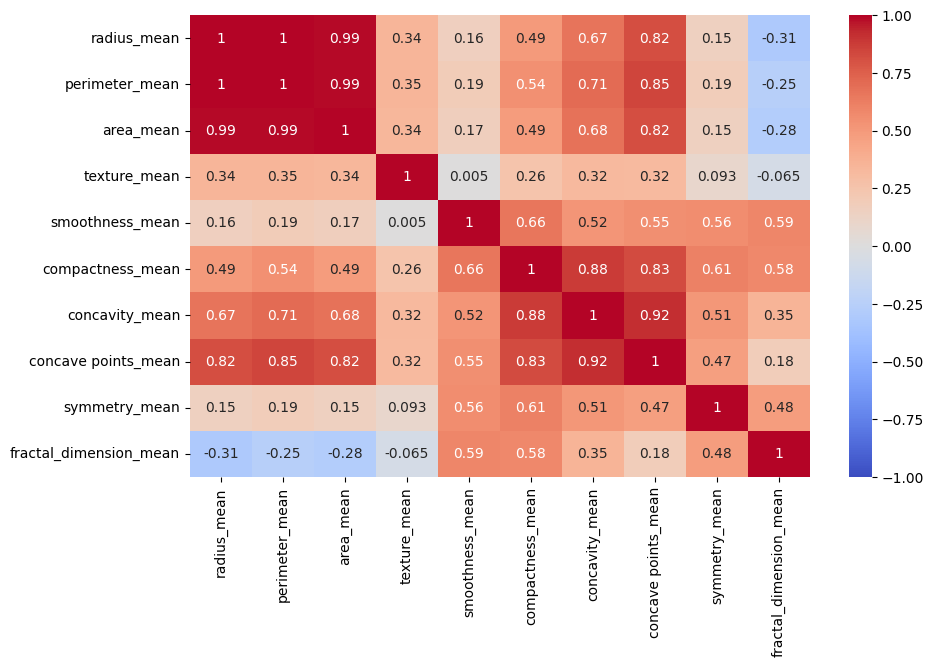

In [ ]:
# HEATMAP: On fait le graph Heatmap visualiser les matrices de corrélation entre plusieurs variables
df_corr = df_cancer_mean.iloc[:,2:].corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, center =0, vmin=-1, vmax=1)
plt.show()

## **Concl:**
 - On peut observer que le **"radius_mean"** a une corrélation de 1 et 0,99 avec le **"perimeter mean"** et la **"area mean"** respectivement. C’est parce que les trois caractéristiques concernent essentiellement la taille physique de la cellule et contiennent la même information mais représentées à des échelles différentes.<br>
 ==> Afin d’éviter la multicolinéarité, une seule des trois colonnes devrait être utilisée dans l’analyse prédictive à venir. Perimetre: (2πr) et la surface (𝜋r2)sont calculés sur la base du rayon (r), il est judicieux de garder le rayon et de supprimer le périmètre et la zone.
 - il semble que la **"compactness_mean"**, la **"concavity_mean"**, et les **"concave m points_mean"** sont également fortement corrélés. Comme les points concaves moyens et la concavité moyenne sont également relativement plus fortement corrélés avec d’autres caractéristiques, il semble plus raisonnable de conserver la compacité moyenne et de supprimer la concavité moyenne et les points concaves moyens pour éliminer la multicollinéarité.

### **Tests de Significativité => Le test Mann-Whitneyu:**

In [ ]:
from scipy.stats import mannwhitneyu

# partie MannWithneyU
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean']

# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_breast[df_cancer_breast['diagnosis'] == 'B'][columns]
malignant = df_cancer_breast[df_cancer_breast['diagnosis'] == 'M'][columns]

Mann_statistics = []
p_values_Mann = []
significant_Mann = []

for colonne in columns:
  stat, result = mannwhitneyu(benign[colonne], malignant[colonne])
  Mann_statistics.append(stat)
  p_values_Mann.append(result)
  significant_Mann.append(result < 0.05)

results_Mann = pd.DataFrame({
    'Variable': columns,                                                         # Le nom de la variable analysée.
    'P-Value_Mann': p_values_Mann,                                                 # Indicateur de significativité (True si p < 0.05, False sinon).
    'Significant (p < 0.05)': significant_Mann
})
results_Mann

Variable  P-Value_Mann  Significant (p < 0.05)
0             radius_mean  1.067134e-66                    True
1            texture_mean  2.593173e-29                    True
2          perimeter_mean  1.306119e-69                    True
3               area_mean  6.040025e-67                    True
4         smoothness_mean  3.544056e-18                    True
5        compactness_mean  5.400879e-46                    True
6          concavity_mean  9.228959e-67                    True
7     concave points_mean  2.968086e-75                    True
8           symmetry_mean  1.831145e-15                    True
9  fractal_dimension_mean  6.153262e-01                   False

### **Tests de Significativité => Le test Kruskal-Wallis:**

Le test de Kruskal-Wallis est un test statistique non paramétrique utilisé pour comparer les distributions de groupes de données afin de déterminer s'il existe des différences significatives entre eux.  
Il est souvent utilisé comme alternative au test ANOVA lorsque les hypothèses de normalité ne sont pas respectées.

**H-Statistic** : La statistique H pour chaque variable indique la différence entre les groupes bénins et malins.

**P-Value :** La valeur p associée à chaque test indique le niveau de significativité. Toutes les valeurs p sont inférieures à 0.05, indiquant des différences significatives entre les deux groupes pour toutes les variables.

**Significant (p < 0.05) :** **texte en gras** Cette colonne confirme que les différences entre les groupes sont statistiquement significatives pour toutes les variables.




In [ ]:
from scipy.stats import kruskal

columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean']

# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_breast[df_cancer_breast['diagnosis'] == 'B'][columns]
malignant = df_cancer_breast[df_cancer_breast['diagnosis'] == 'M'][columns]

# Initialisation des listes pour stocker les résultats
h_statistics = []
p_values_kruskal = []
significant_kruskal = []

# Effectuer le test Kruskal-Wallis pour chaque colonne
for col in columns:
    # Test Kruskal-Wallis
    h_stat, p_val_kruskal = kruskal(benign[col], malignant[col])
    h_statistics.append(h_stat)
    p_values_kruskal.append(p_val_kruskal)
    significant_kruskal.append(p_val_kruskal < 0.05)

# Création d'un DataFrame pour les résultats
results_kruskal = pd.DataFrame({
    'Variable': columns,                                                         # Le nom de la variable analysée.
    'H-Statistic': h_statistics,                                                 # La valeur p associée au test t
    'P-Value': p_values_kruskal,                                                 # Indicateur de significativité (True si p < 0.05, False sinon).
    'Significant (p < 0.05)': significant_kruskal
})

# Affichage des résultats
results_kruskal


Variable  H-Statistic       P-Value  Significant (p < 0.05)
0             radius_mean   297.666468  1.062126e-66                    True
1            texture_mean   126.344207  2.585203e-29                    True
2          perimeter_mean   311.034374  1.299854e-69                    True
3               area_mean   298.801014  6.011624e-67                    True
4         smoothness_mean    75.565084  3.535586e-18                    True
5        compactness_mean   202.699426  5.379921e-46                    True
6          concavity_mean   297.955938  9.185624e-67                    True
7     concave points_mean   336.944542  2.953274e-75                    True
8           symmetry_mean    63.243029  1.827131e-15                    True
9  fractal_dimension_mean     0.252765  6.151351e-01                   False

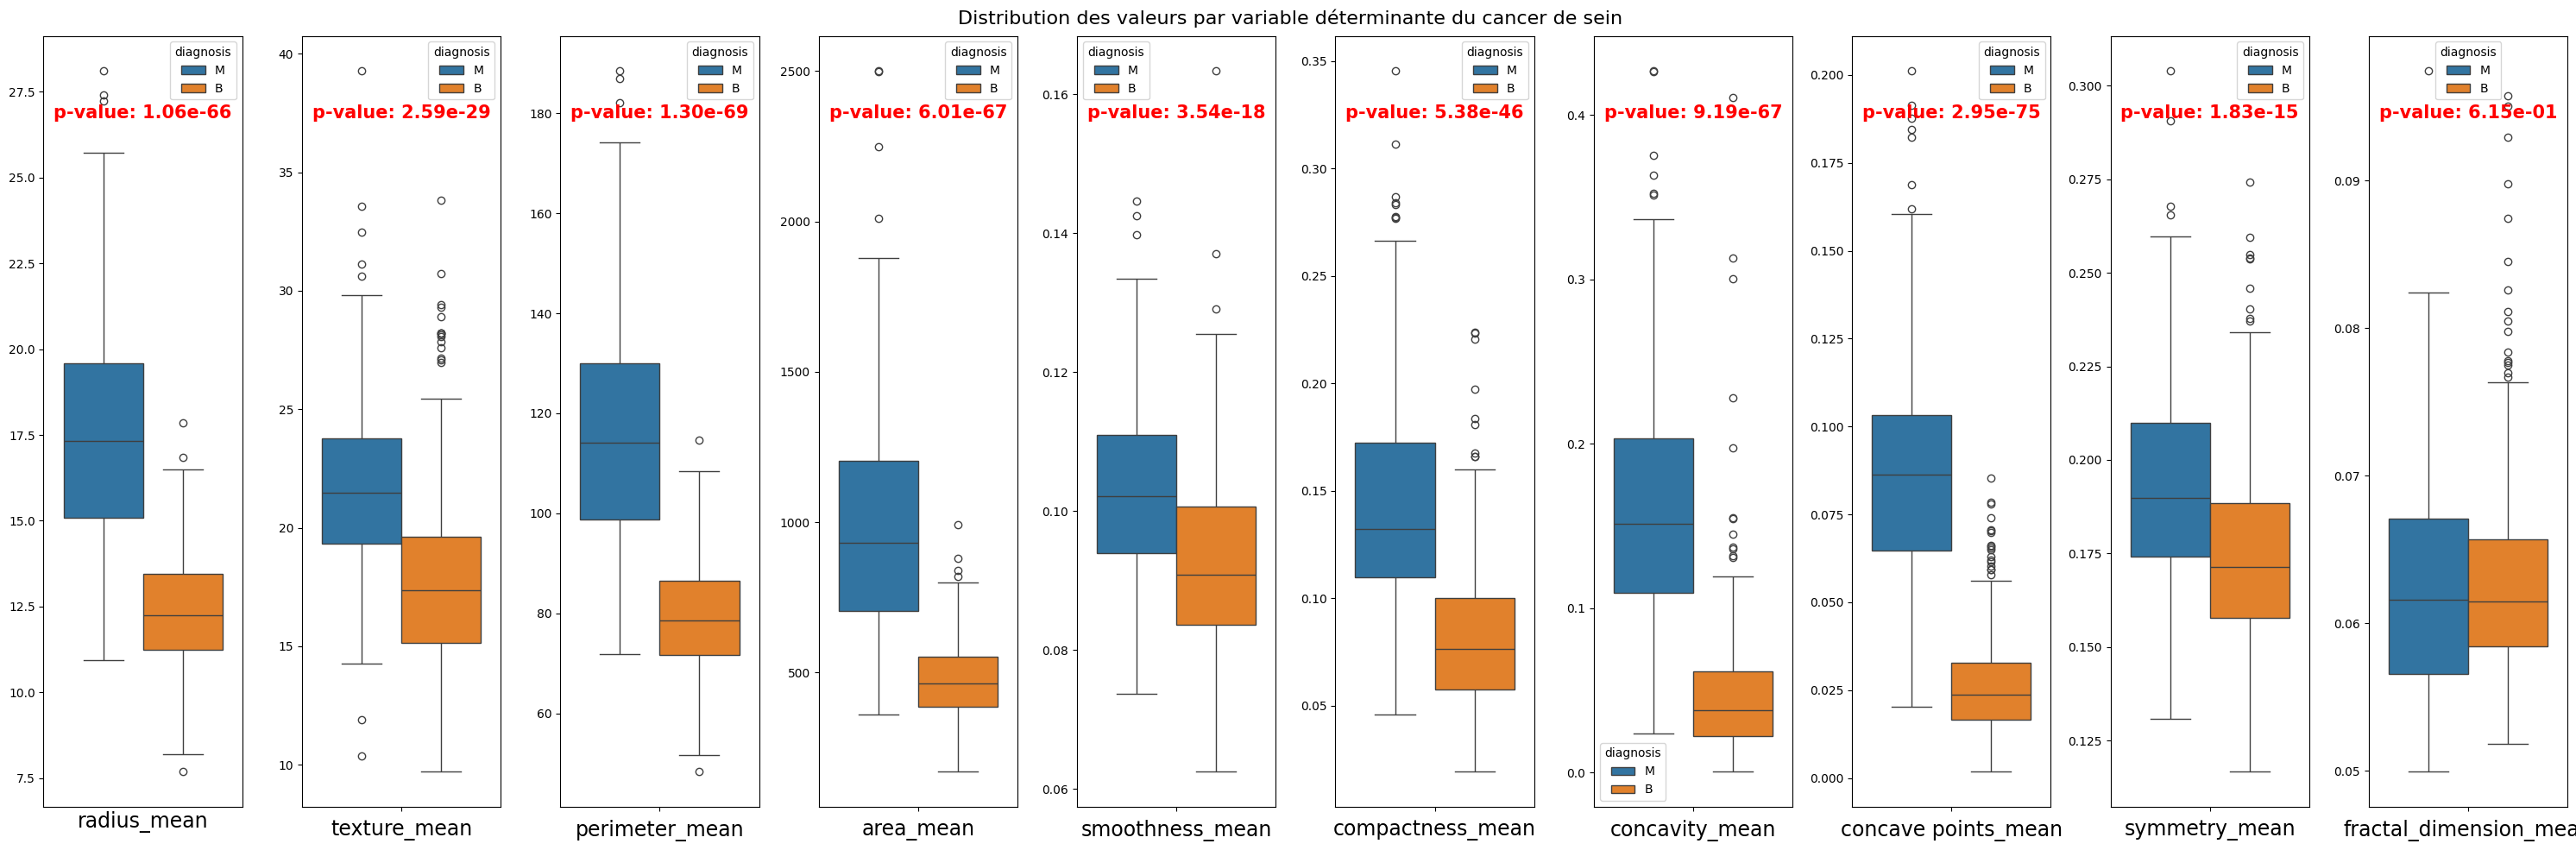

In [ ]:
## BOXPLOTS: pour résumer et comparer des distributions de nos variables numériques : visualiser rapidement la médiane, les quartiles, la dispersion et les valeurs aberrantes
import seaborn as sns
import matplotlib.pyplot as plt

data = df_cancer_mean
fig, axs = plt.subplots(ncols=10, figsize=(30, 10))
fig.suptitle('Distribution des valeurs par variable déterminante du cancer de sein', fontsize=16)

variables_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean']

# Convertir la liste des variables et p-values en dictionnaire pour un accès rapide
p_values_dict = dict(zip(results_kruskal['Variable'], results_kruskal['P-Value']))

for i, var in enumerate(variables_mean):
    sns.boxplot(data=data, y=var, ax=axs[i], hue="diagnosis")
    axs[i].set_xlabel(var, fontsize=17)
    axs[i].set_ylabel("")

    # Ajouter la p-value sur le graphique
    p_value = p_values_dict[var]
    axs[i].annotate(f'p-value: {p_value:.2e}', xy=(0.5,0.9), xycoords='axes fraction',
                   ha='center', va='center',fontsize=15, color='red',fontweight='bold')

fig.axes[0].set_xticks([])
plt.tight_layout()
plt.show()

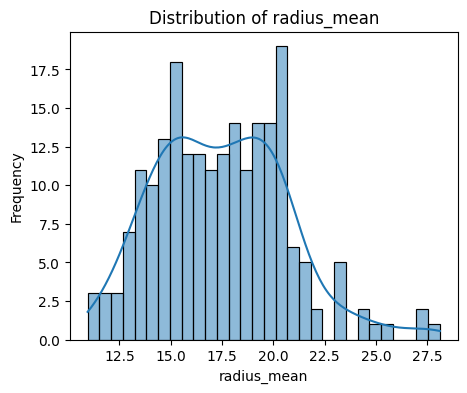

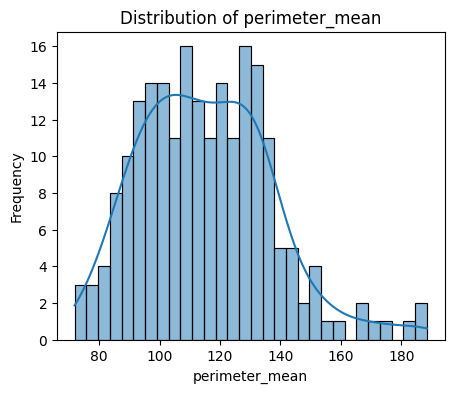

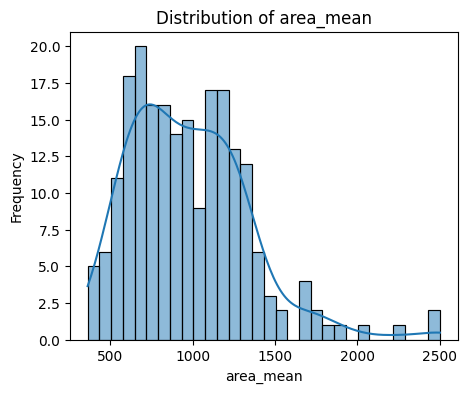

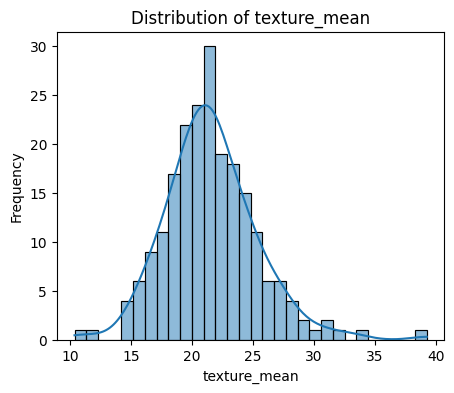

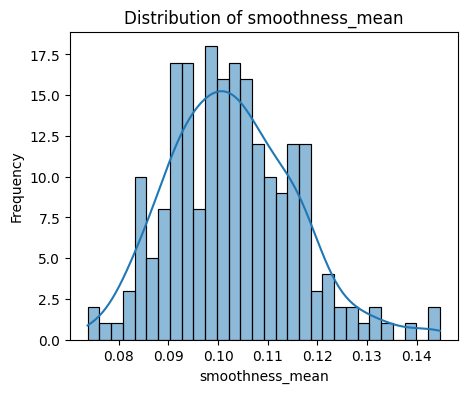

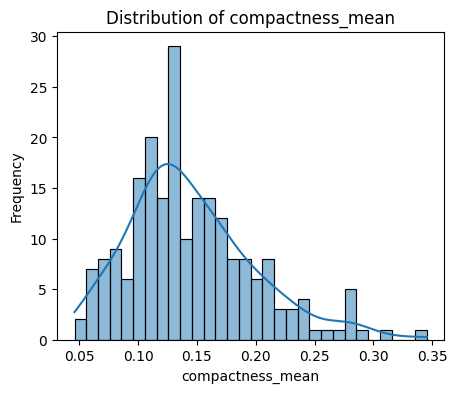

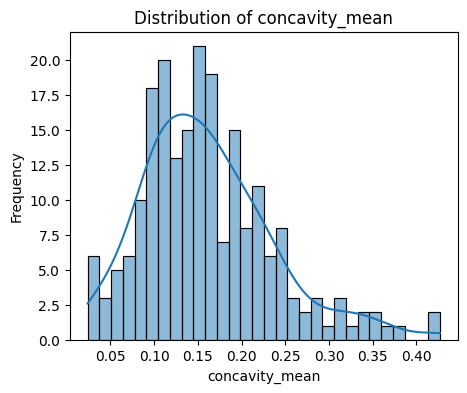

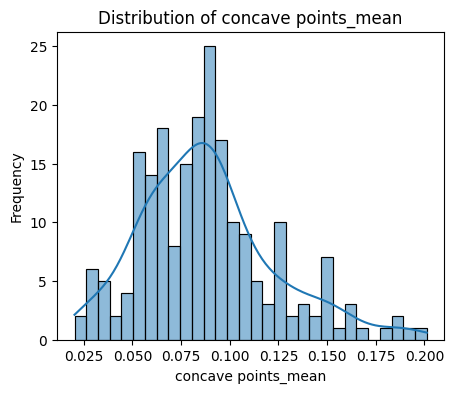

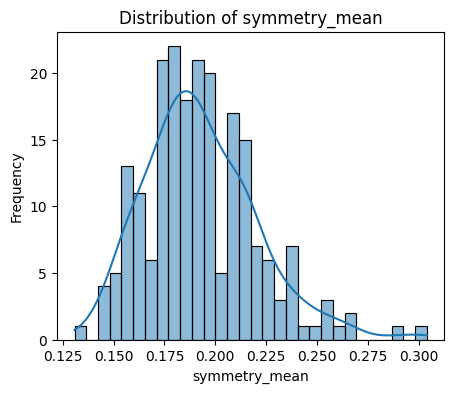

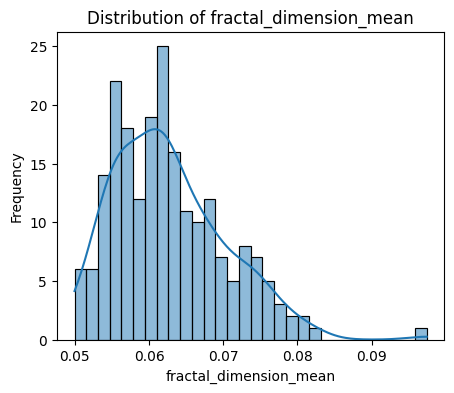

In [ ]:
# visualiser la distribution des valeurs des différentes variables en séparant 2 groupes: benign et malignant
# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_mean[df_cancer_mean['diagnosis'] == 'B']
malignant = df_cancer_mean[df_cancer_mean['diagnosis'] == 'M']

# une boucle pour le graph des patients ayant le diagnostic "M: malignant" :
for var in malignant.iloc[:,2:]:
    plt.figure(figsize=(5,4))
    sns.histplot(malignant[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

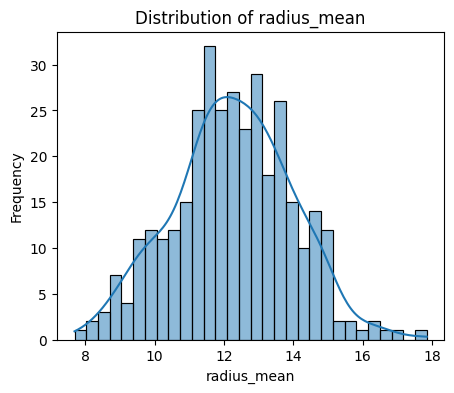

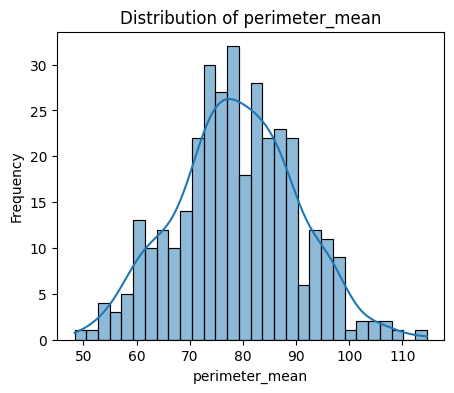

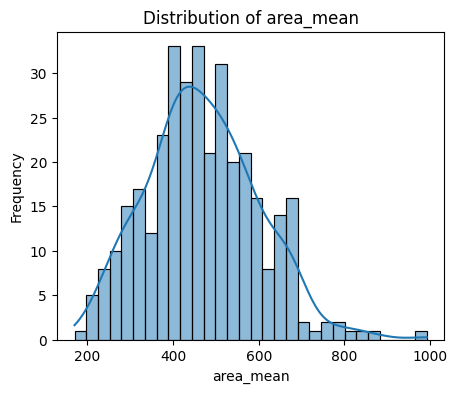

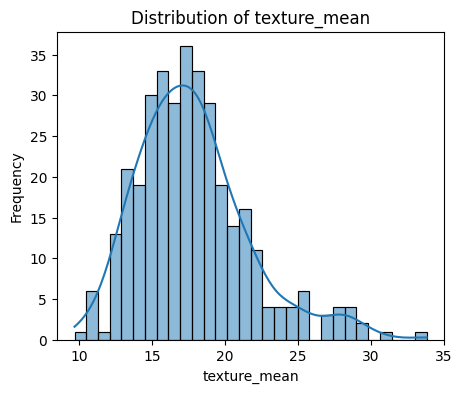

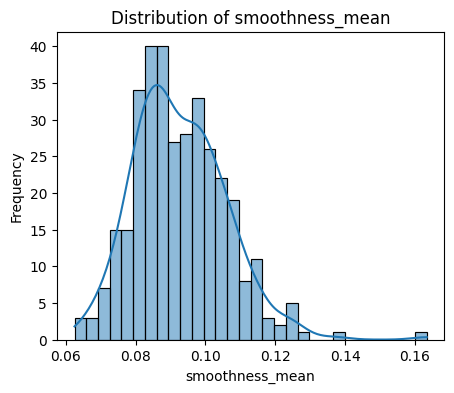

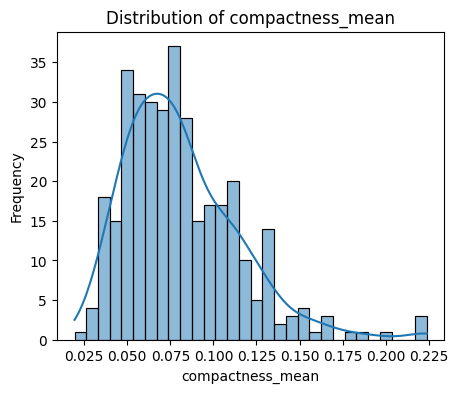

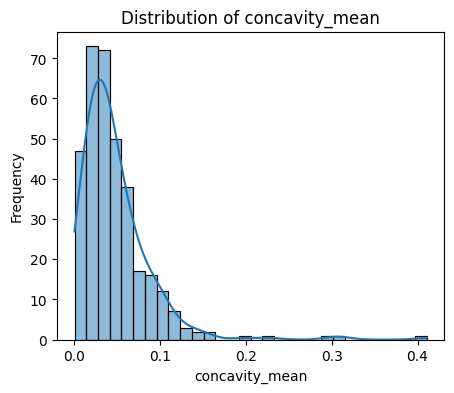

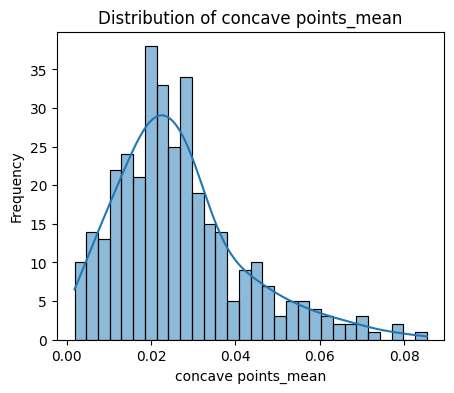

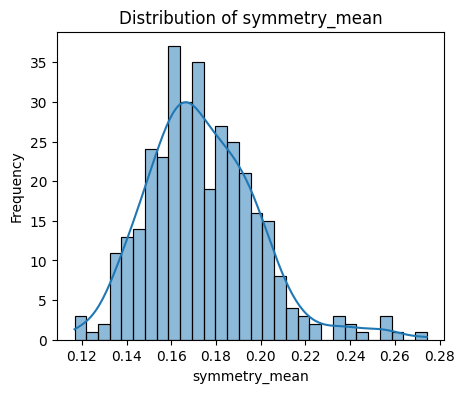

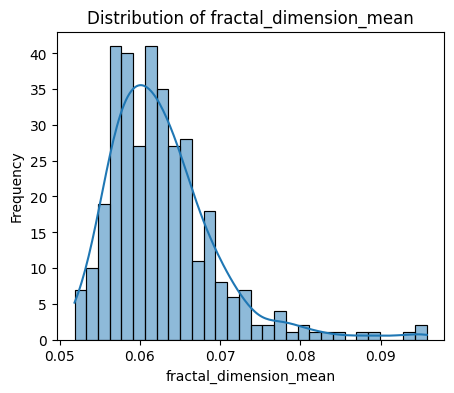

In [ ]:
# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_mean[df_cancer_mean['diagnosis'] == 'B']
malignant = df_cancer_mean[df_cancer_mean['diagnosis'] == 'M']

# une boucle pour le graph des patients ayant le diagnostic "B: benign" :
for var in benign.iloc[:,2:]:
    plt.figure(figsize=(5,4))
    sns.histplot(benign[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## **DATAVIZ des valeurs SE**

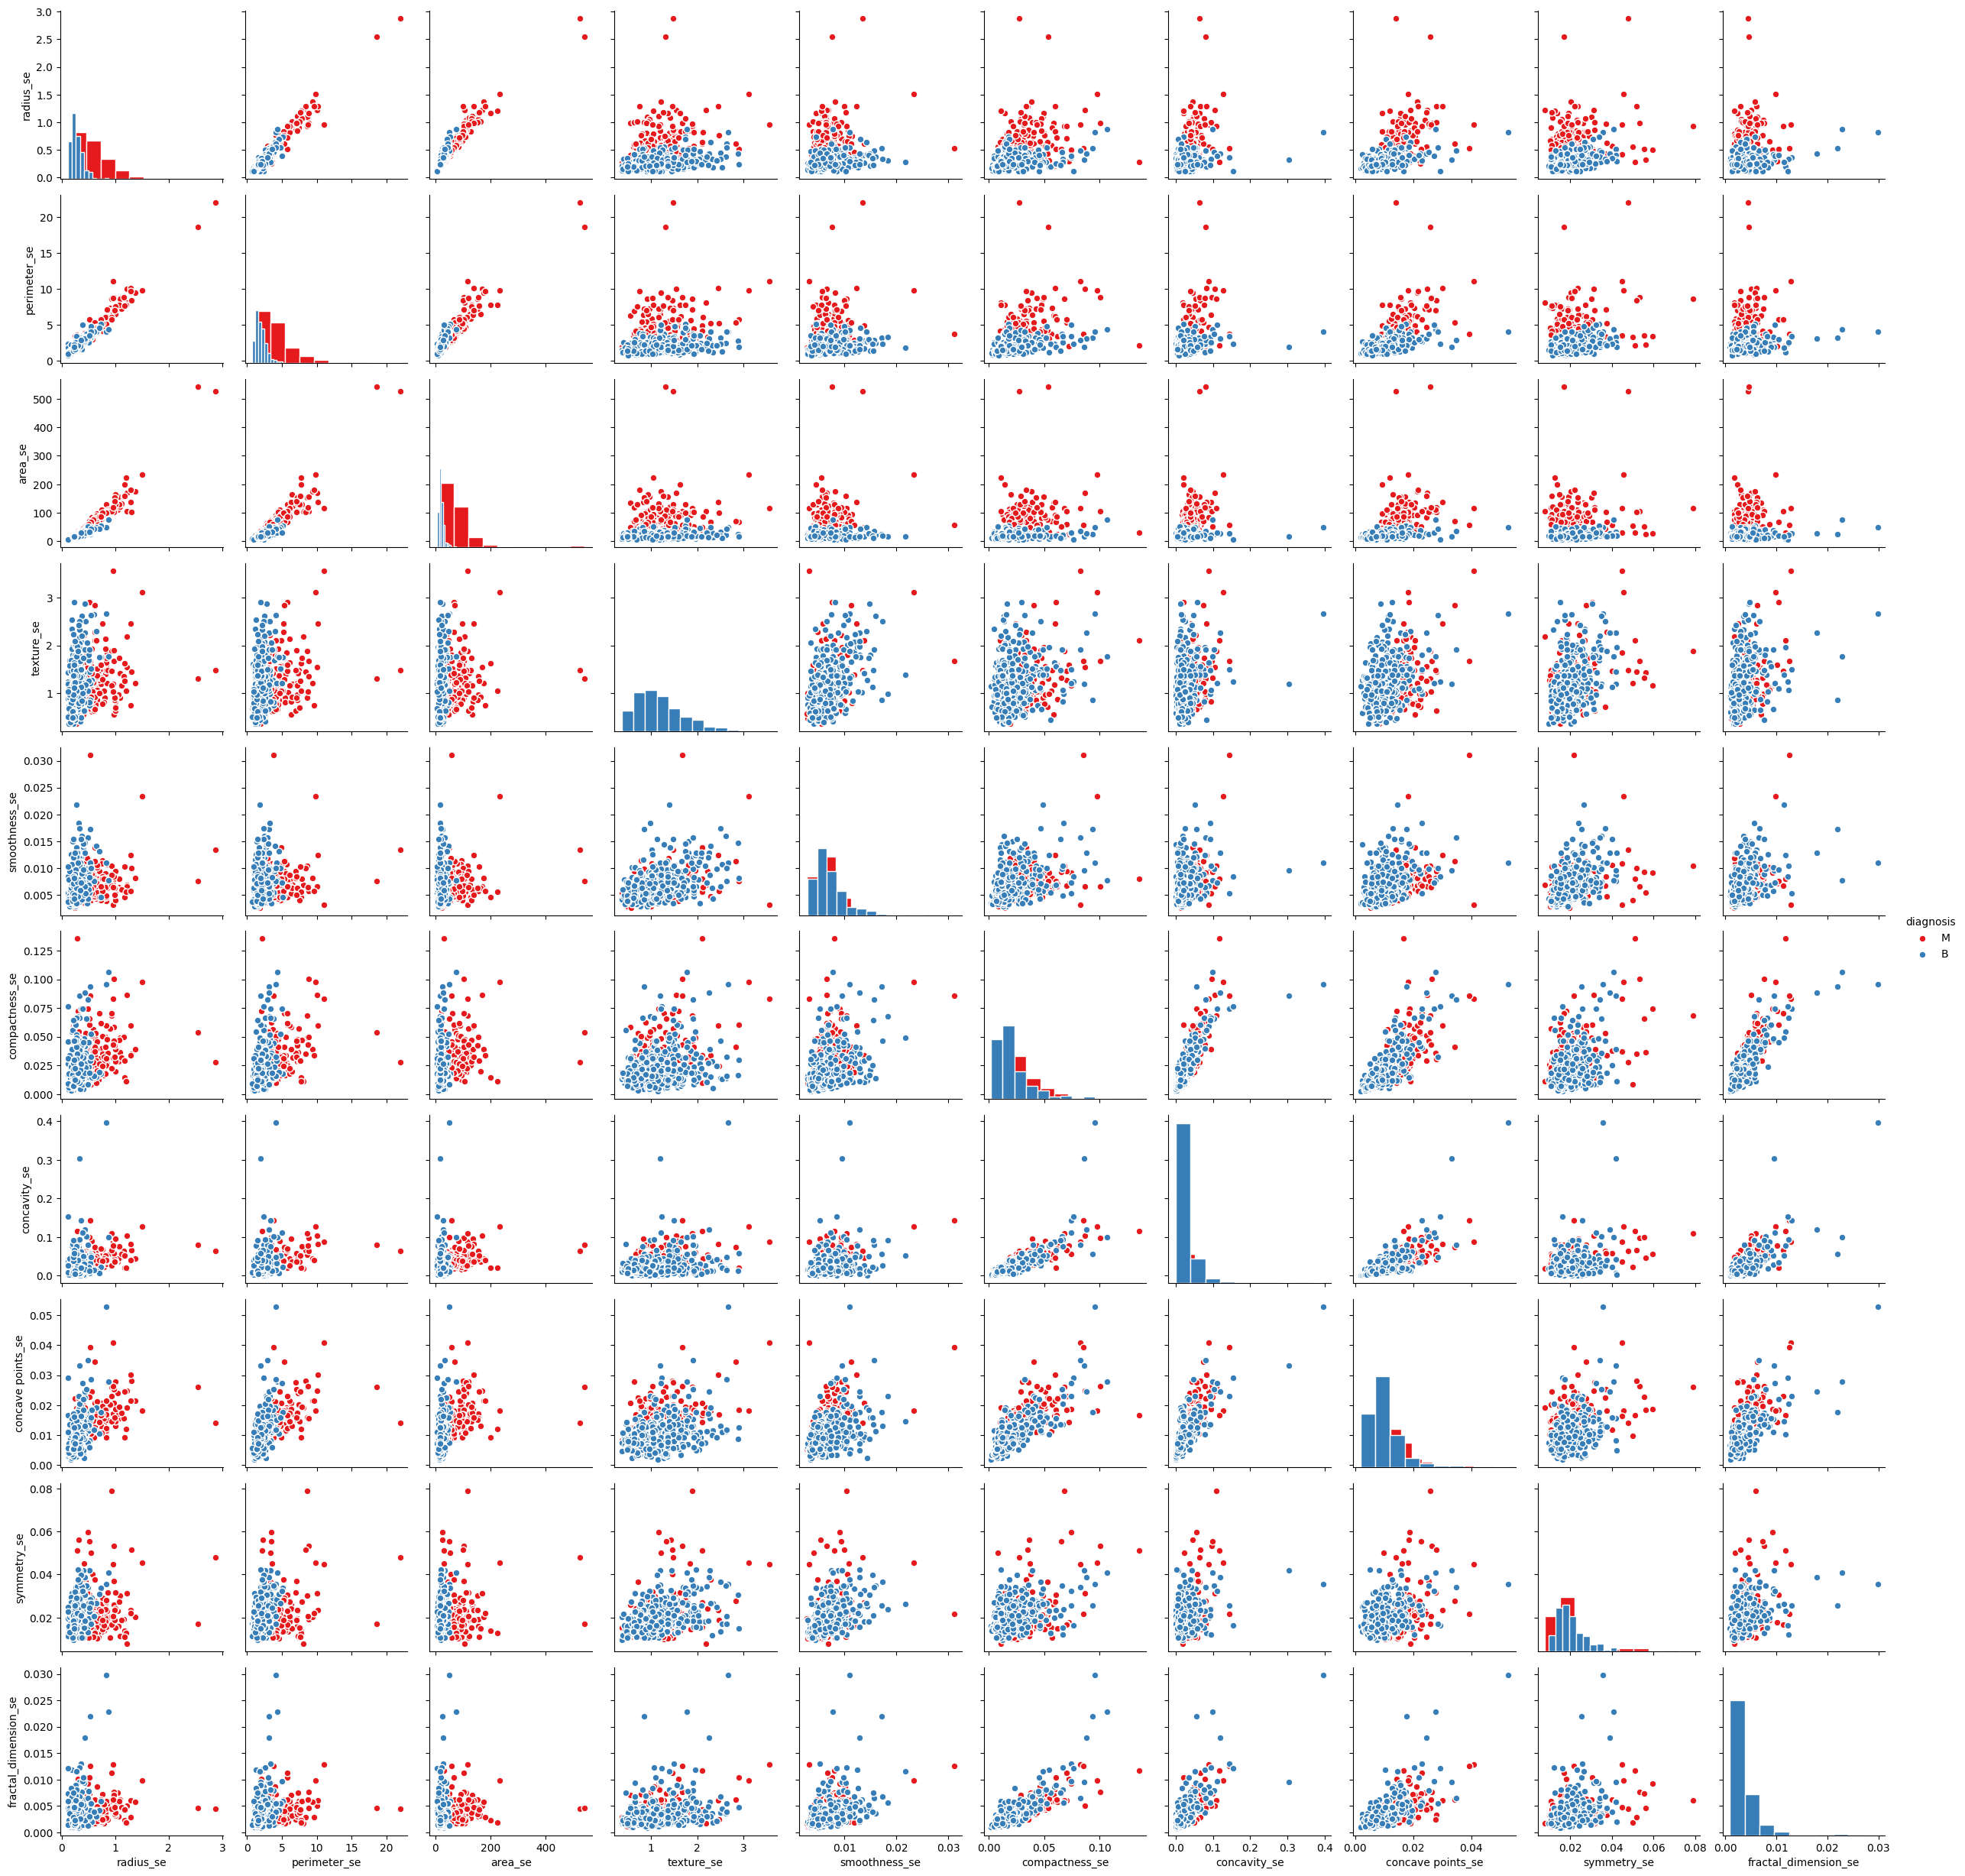

In [ ]:
# PairGrid : On visualise les relations entre les variables _SE:
palette_inverted = sns.color_palette("Set1")
graph_se = sns.PairGrid(df_cancer_se.iloc[:,1:], hue="diagnosis", palette=palette_inverted)
graph_se= graph_se.map_diag(plt.hist, edgecolor="w")
graph_se = graph_se.map_offdiag(plt.scatter, edgecolor="w", s=40)
graph_se = graph_se.add_legend()
plt.show()

## **Concl:**

XXX

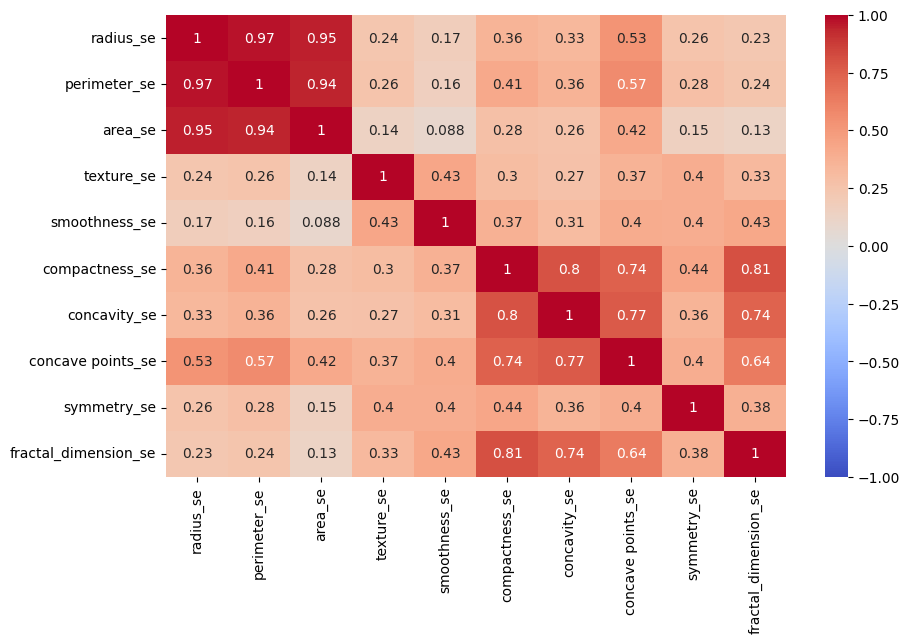

In [ ]:
# HEATMAP: On fait le graph Heatmap visualiser les matrices de corrélation entre plusieurs variables
df_corr = df_cancer_se.iloc[:,2:].corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, center =0, vmin=-1, vmax=1)
plt.show()

In [ ]:
# Tests de Significativité => Le test Kruskal-Wallis:pour comparer les distributions de groupes de données afin de déterminer s'il existe des différences significatives entre eux.

columns_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se']

# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_se[df_cancer_se['diagnosis'] == 'B'][columns_se]
malignant = df_cancer_se[df_cancer_se['diagnosis'] == 'M'][columns_se]

# Initialisation des listes pour stocker les résultats
h_statistics = []
p_values_kruskal = []
significant_kruskal = []

# Effectuer le test Kruskal-Wallis pour chaque colonne
for col in columns_se:
    # Test Kruskal-Wallis
    h_stat, p_val_kruskal = kruskal(benign[col], malignant[col])
    h_statistics.append(h_stat)
    p_values_kruskal.append(p_val_kruskal)
    significant_kruskal.append(p_val_kruskal < 0.05)

# Création d'un DataFrame pour les résultats
results_kruskal = pd.DataFrame({
    'Variable': columns_se,                                                      # Le nom de la variable analysée.
    'H-Statistic': h_statistics,                                                 # La valeur p associée au test t
    'P-Value': p_values_kruskal,                                                 # Indicateur de significativité (True si p < 0.05, False sinon).
    'Significant (p < 0.05)': significant_kruskal
})

# Affichage des résultats
results_kruskal

Variable  H-Statistic       P-Value  Significant (p < 0.05)
0             radius_se   216.971572  4.139820e-49                    True
1            texture_se     0.769555  3.803547e-01                   False
2          perimeter_se   224.904796  7.701491e-51                    True
3               area_se   285.351728  5.121540e-64                    True
4         smoothness_se     0.771940  3.796176e-01                   False
5        compactness_se    75.036508  4.620900e-18                    True
6          concavity_se   116.699296  3.340649e-27                    True
7     concave points_se   126.655781  2.209584e-29                    True
8           symmetry_se     3.093500  7.860555e-02                   False
9  fractal_dimension_se    23.373514  1.334028e-06                    True

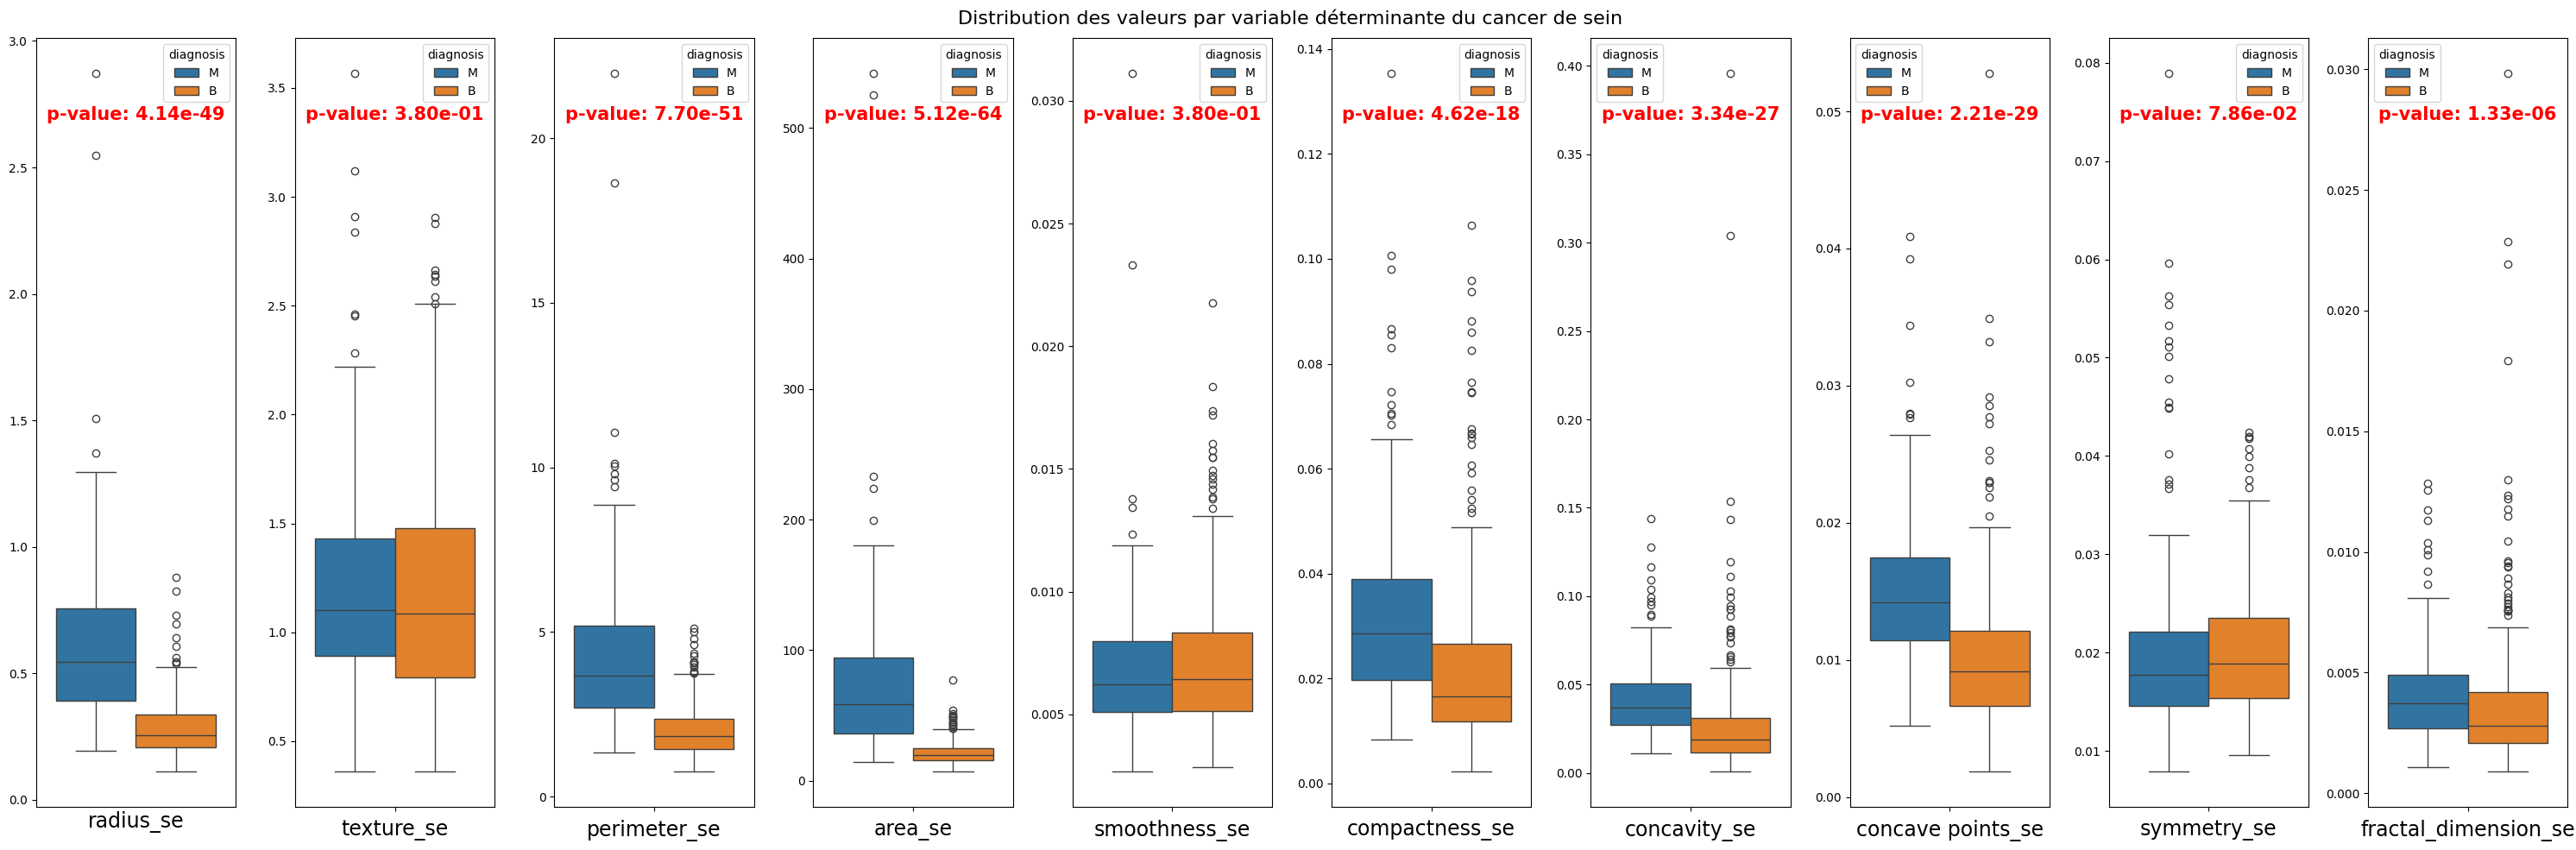

In [ ]:
## BOXPLOTS: pour résumer et comparer des distributions de nos variables numériques : visualiser rapidement la médiane, les quartiles, la dispersion et les valeurs aberrantes
import seaborn as sns
import matplotlib.pyplot as plt

data = df_cancer_se
fig, axs = plt.subplots(ncols=10, figsize=(30, 10))
fig.suptitle('Distribution des valeurs par variable déterminante du cancer de sein', fontsize=16)

variables_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se']

# Convertir la liste des variables et p-values en dictionnaire pour un accès rapide
p_values_dict = dict(zip(results_kruskal['Variable'], results_kruskal['P-Value']))

for i, var in enumerate(variables_se):
    sns.boxplot(data=data, y=var, ax=axs[i], hue="diagnosis")
    axs[i].set_xlabel(var, fontsize=17)
    axs[i].set_ylabel("")

    # Ajouter la p-value sur le graphique
    p_value = p_values_dict[var]
    axs[i].annotate(f'p-value: {p_value:.2e}', xy=(0.5,0.9), xycoords='axes fraction',
                   ha='center', va='center',fontsize=15, color='red',fontweight='bold')

fig.axes[0].set_xticks([])
plt.tight_layout()
plt.show()

## **DATAVIZ des valeurs _WORST**

In [ ]:
df_cancer_worst = df_cancer_breast[['id', 'diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst',
        'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]

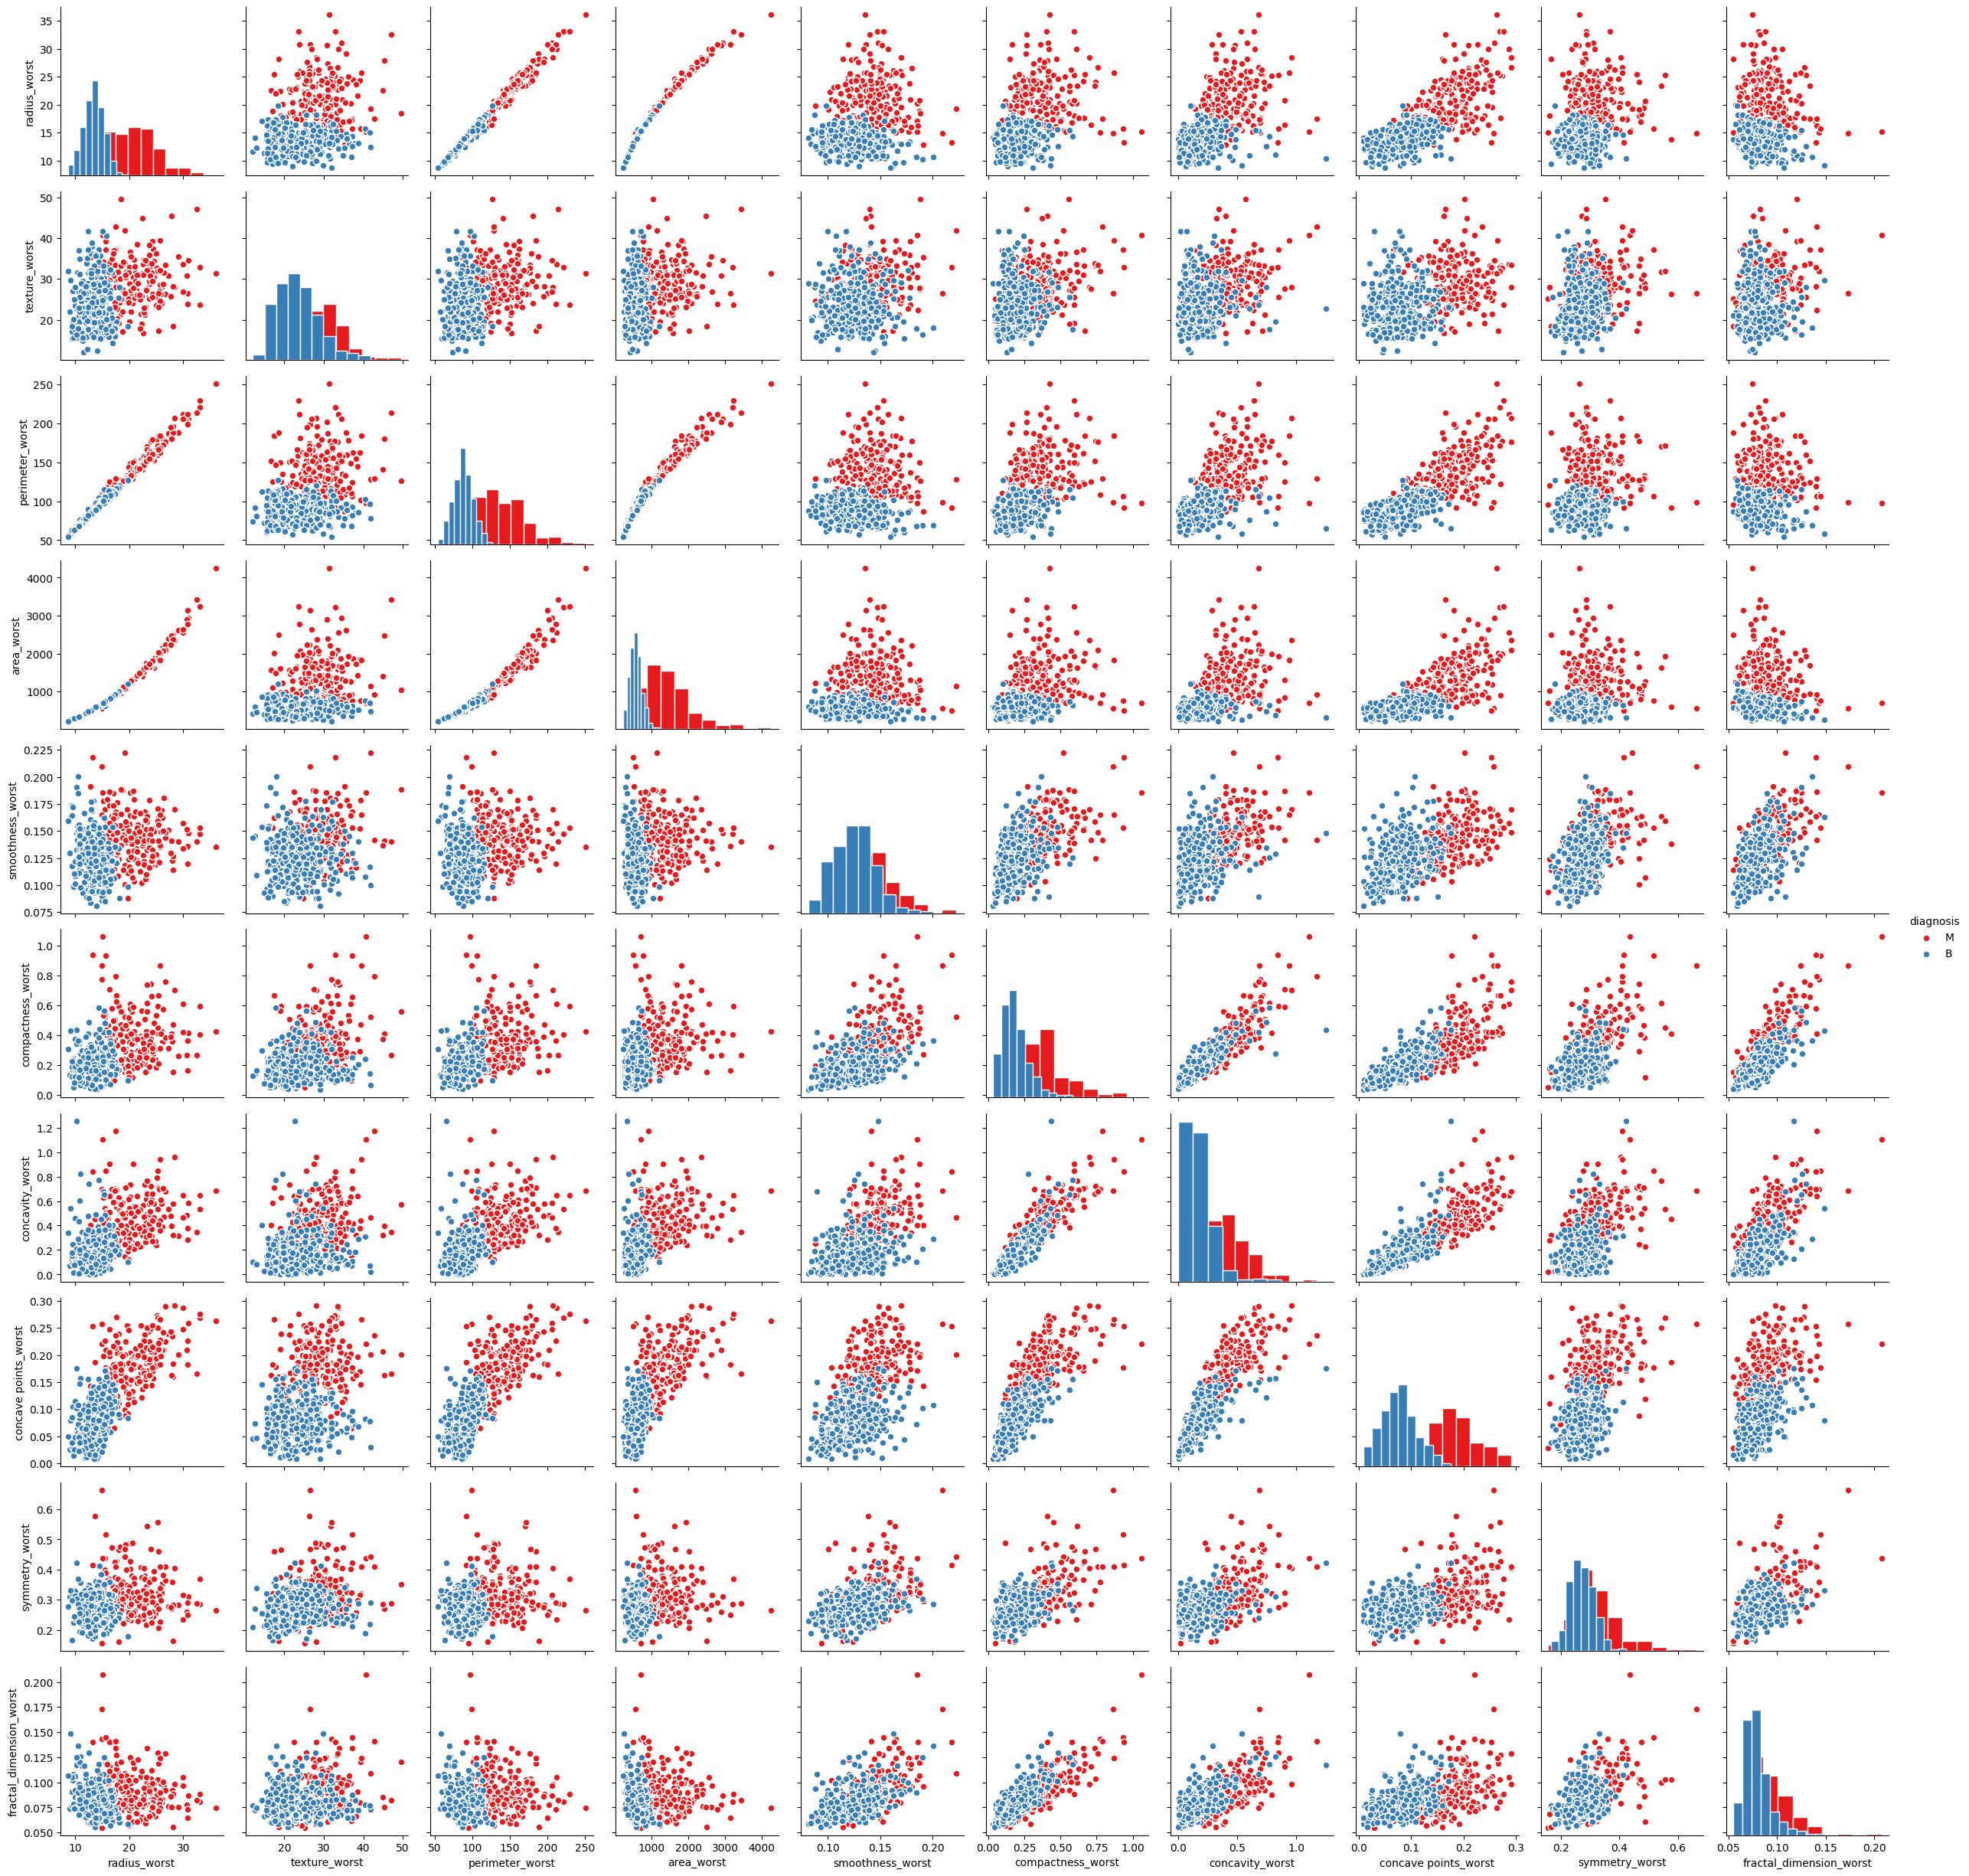

In [ ]:
# PairGrid : On visualise les relations entre les variables _WORST:
palette_inverted = sns.color_palette("Set1")
graph_worst = sns.PairGrid(df_cancer_worst.iloc[:,1:], hue="diagnosis", palette=palette_inverted)
graph_worst= graph_worst.map_diag(plt.hist, edgecolor="w")
graph_worst= graph_worst.map_offdiag(plt.scatter, edgecolor="w", s=40)
graph_worst = graph_worst.add_legend()
plt.show()

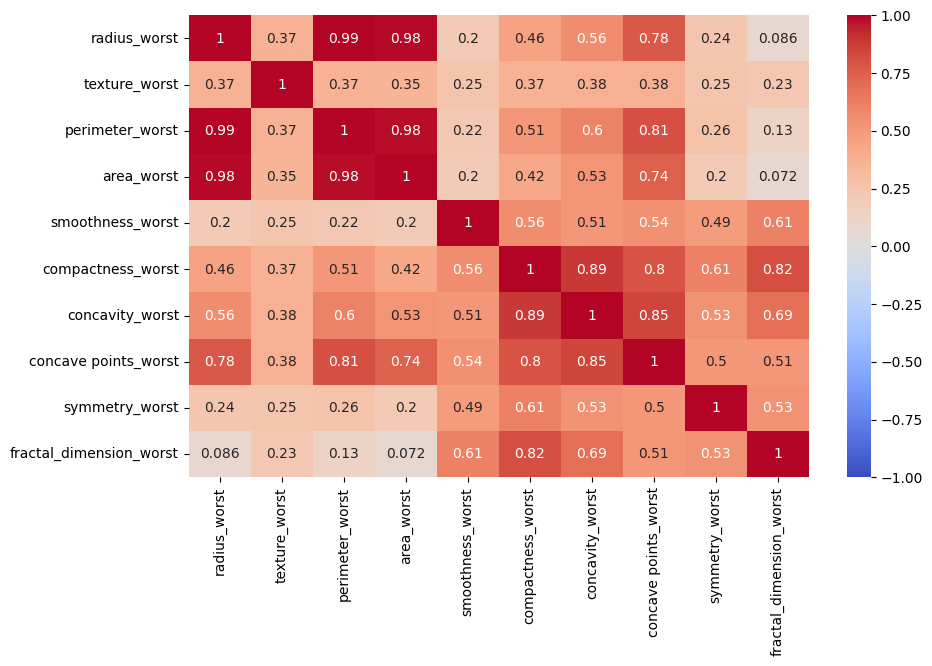

In [ ]:
# HEATMAP: On fait le graph Heatmap visualiser les matrices de corrélation entre plusieurs variables
df_corr_worst = df_cancer_worst.iloc[:,2:].corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_corr_worst, cmap='coolwarm', annot=True, center =0, vmin=-1, vmax=1)
plt.show()

In [ ]:
# Tests de Significativité => Le test Kruskal-Wallis:pour comparer les distributions de groupes de données afin de déterminer s'il existe des différences significatives entre eux.

columns_worst = ['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
             'concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst']

# Séparation des données en deux groupes : bénignes et malignes
benign = df_cancer_worst[df_cancer_worst['diagnosis'] == 'B'][columns_worst]
malignant = df_cancer_worst[df_cancer_worst['diagnosis'] == 'M'][columns_worst]

# Initialisation des listes pour stocker les résultats
h_statistics = []
p_values_kruskal = []
significant_kruskal = []

# Effectuer le test Kruskal-Wallis pour chaque colonne
for col in columns_worst:
    # Test Kruskal-Wallis
    h_stat, p_val_kruskal = kruskal(benign[col], malignant[col])
    h_statistics.append(h_stat)
    p_values_kruskal.append(p_val_kruskal)
    significant_kruskal.append(p_val_kruskal < 0.05)

# Création d'un DataFrame pour les résultats
results_kruskal = pd.DataFrame({
    'Variable': columns_worst,                                                  # Le nom de la variable analysée.
    'H-Statistic': h_statistics,
    'P-Value': p_values_kruskal,                                                # La valeur p associée au test t
    'Significant (p < 0.05)': significant_kruskal                               # Indicateur de significativité (True si p < 0.05, False sinon).
})

# Affichage des résultats
results_kruskal

Variable  H-Statistic       P-Value  Significant (p < 0.05)
0             radius_worst   346.137138  2.939989e-77                    True
1            texture_worst   131.552915  1.874116e-30                    True
2          perimeter_worst   353.781793  6.362283e-79                    True
3               area_worst   345.195532  4.714123e-77                    True
4         smoothness_worst    98.969989  2.563574e-23                    True
5        compactness_worst   200.669418  1.491939e-45                    True
6          concavity_worst   275.034811  9.070493e-62                    True
7     concave points_worst   340.376089  5.284031e-76                    True
8           symmetry_worst    87.217899  9.720016e-21                    True
9  fractal_dimension_worst    53.195217  3.019932e-13                    True

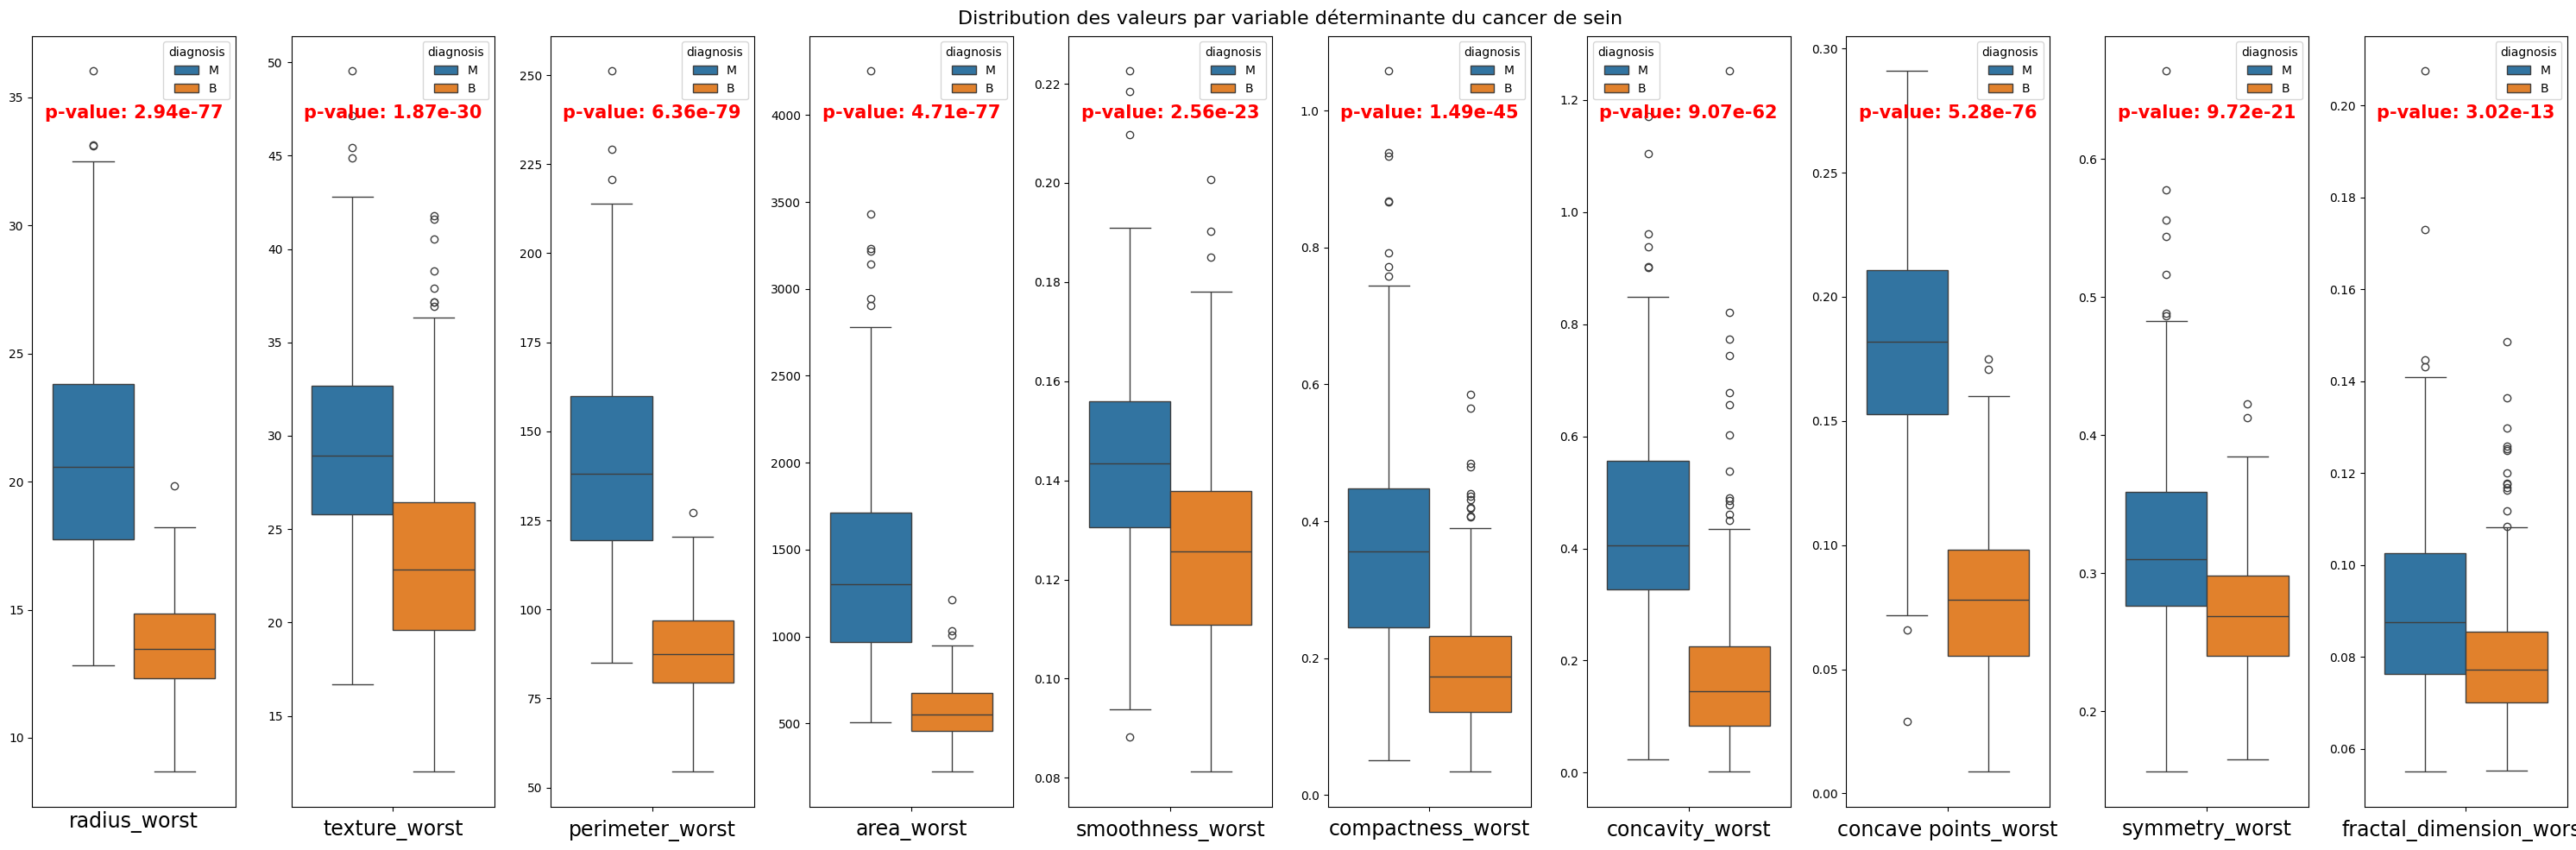

In [ ]:
## BOXPLOTS: pour résumer et comparer des distributions de nos variables numériques : visualiser rapidement la médiane, les quartiles, la dispersion et les valeurs aberrantes

data = df_cancer_worst
fig, axs = plt.subplots(ncols=10, figsize=(30, 10))
fig.suptitle('Distribution des valeurs par variable déterminante du cancer de sein', fontsize=16)

variables_worst = ['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
             'concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst']

# Convertir la liste des variables et p-values en dictionnaire pour un accès rapide
p_values_dict = dict(zip(results_kruskal['Variable'], results_kruskal['P-Value']))

for i, var in enumerate(variables_worst):
    sns.boxplot(data=data, y=var, ax=axs[i], hue="diagnosis")
    axs[i].set_xlabel(var, fontsize=17)
    axs[i].set_ylabel("")

    # Ajouter la p-value sur le graphique
    p_value = p_values_dict[var]
    axs[i].annotate(f'p-value: {p_value:.2e}', xy=(0.5,0.9), xycoords='axes fraction',
                   ha='center', va='center',fontsize=15, color='red',fontweight='bold')

fig.axes[0].set_xticks([])
plt.tight_layout()
plt.show()

In [ ]:
# Enregistrer fichier POUR LE MACHINE LEARNING
df_cancer_breast.to_csv("df_cancer_clean.csv")